## Assignment 4: Data Scraping and Text Analysis

Total: 50

In [28]:
from bs4 import BeautifulSoup as bsp
import pandas as pd
import re
import requests
import nltk
from nltk.tag import StanfordNERTagger
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import pos_tag
from ast import literal_eval
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
ner = StanfordNERTagger('/content/english.conll.4class.distsim.crf.ser.gz', '/content/stanford-ner.jar')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Q1** [15]

Download the following information for the top 1000 movies from this [link](https://www.imdb.com/search/title/?title_type=feature&year=1950-01-01,2019-12-31&sort=num_votes,desc&start=). 

+ ID
+ Title
+ Genre
+ Short Summary (**Not discussed in class**)

In the attached image, I have highlighted the things that you need to extract for each movie.

Create a dataframe with the above information.
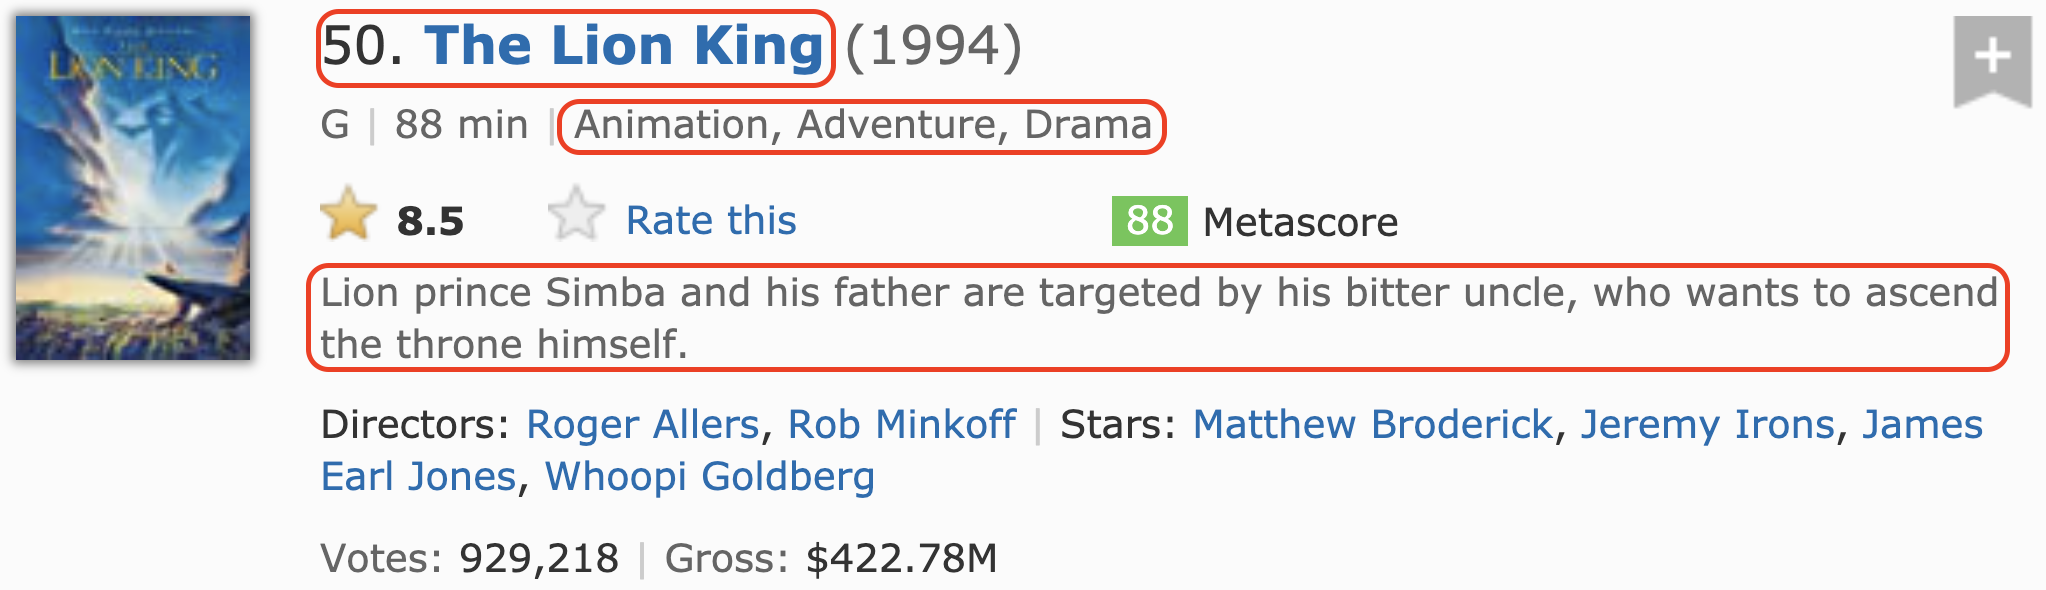

In [39]:
# Dataframe template
data = pd.DataFrame(columns=['ID','Title','Genre','Summary'])

#Get page data function
def getPageContent(start):
  url = 'https://www.imdb.com/search/title/?title_type=feature&year=1950-01-01,2019-12-31&sort=num_votes,desc&start='+str(start)
  r = requests.get(url)
  bs = bsp(r.text, "lxml")
  return bs

#Run for top 1000
for start in range(1,1001,50):
  bs = getPageContent(start)
  movies = bs.findAll("div", "lister-item-content")
  for movie in movies:
    id = movie.find("span", "lister-item-index").contents[0]
    title = movie.find('a').contents[0]
    genres = movie.find('span', 'genre').contents[0]
    genres = [g.strip() for g in genres.split(',')]
    summary = movie.find("p", "text-muted").find_next_sibling("p").contents[0]
  
    i = data.shape[0]
    data.loc[i] = [id,title,genres,summary]

#Clean data
data.ID = [pd.to_numeric(re.sub('\D','',str(i))) for i in data.ID] #remove . from ID
data.Summary = [(re.sub('\n','',str(s))) for s in data.Summary]

data.head(51)

,ID,Title,Genre,Summary
0,1,The Shawshank Redemption,[Drama],Two imprisoned men bond over a number of years...
1,2,The Dark Knight,"[Action, Crime, Drama]",When the menace known as the Joker wreaks havo...
2,3,Inception,"[Action, Adventure, Sci-Fi]",A thief who steals corporate secrets through t...
3,4,Fight Club,[Drama],An insomniac office worker and a devil-may-car...
4,5,Forrest Gump,"[Drama, Romance]","The presidencies of Kennedy and Johnson, the V..."
5,6,Pulp Fiction,"[Crime, Drama]","The lives of two mob hitmen, a boxer, a gangst..."
6,7,The Matrix,"[Action, Sci-Fi]",When a beautiful stranger leads computer hacke...
7,8,The Lord of the Rings: The Fellowship of the Ring,"[Action, Adventure, Drama]",A meek Hobbit from the Shire and eight compani...
8,9,The Godfather,"[Crime, Drama]",The aging patriarch of an organized crime dyna...
9,10,The Lord of the Rings: The Return of the King,"[Action, Adventure, Drama]",Gandalf and Aragorn lead the World of Men agai...


**Q2** [5]
Write a function that take a string as input, identifies mentions of locations in the string, and returns a list of the locations. If there is no location mentioned in the string, the function should return an empty list. 

**Examples**

```
Input: "I was born in USA but now I am living in UK. I often visit Texas."
Output: ['USA', 'UK', 'Texas']

Input: "Who wants to visit that pizza place?"
Output: []
```



In [24]:
def find_loc(txt):
  loc_list = []
  tags = word_tokenize(txt)
  tags_list = ner.tag(tags)
  for word,tag in tags_list:
    if tag == 'LOCATION':
      loc_list.append(word)
  if len(loc_list) > 0:
    return loc_list
  else:
    return 'None'

find_loc('I was born in the USA, but now am living in the UK. I often visit Texas.')
find_loc('I love Los Angeles.')

['Los', 'Angeles']

**Q3** [5]
Now use the function to find mentions of locations in the movie summaries. Create a column in the dataframe that will store the location list.


In [37]:
data['Locations'] = data['Summary'].apply(find_loc)

data

KeyboardInterrupt: ignored

**Q4** [5]
Find the most common 15 locations from the location column.


In [35]:
movies_with_locs = data[data.Locations != 'None']

def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ' '+ele
    return str1.strip()

# turn lists into strings for processing
movies_with_locs['Locations'] = movies_with_locs['Locations'].apply(listToString)

#group by location and count
most_locs = movies_with_locs.groupby(by='Locations')['ID'].count()

pd.DataFrame(most_locs.sort_values(ascending = False)).head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ID
Locations,
"[ ' L o s ' , ' A n g e l e s ' ]",14
"[ ' N e w ' , ' Y o r k ' , ' C i t y ' ]",13
[ ' L o n d o n ' ],7
[ ' P a r i s ' ],5
[ ' U . S . ' ],4
"[ ' U n i t e d ' , ' S t a t e s ' ]",4
"[ ' L a s ' , ' V e g a s ' ]",4
"[ ' G o t h a m ' , ' C i t y ' ]",4
[ ' A m e r i c a ' ],3


**Q5** [5]
Write a function that take a string as input, identifies adjectives (JJ) in the string, and returns a list of the adjectives. If there is no adjective mentioned in the string, the function should return an empty list. 

**Examples**

```
Input: "The pizza was great."
Output: ['great']

Input: "Who wants to visit that pizza place?"
Output: []
```



In [41]:
def findJJ(txt):
  jj_list = []
  words = word_tokenize(txt)
  words_pos = pos_tag(words)
  for p in words_pos:
    if p[1] == 'JJ':
      jj_list.append(p[0])
  return jj_list

findJJ("I ate the gross pizza.")

['gross']

**Q6** [5]
Now use the function to find adjectives in the movie summaries. Create a column in the dataframe that will store the adjective lists.


In [42]:
data['Adjectives'] = data['Summary'].apply(findJJ)

data

**Q7** [5+3+2]
+ What are the 20 most common adjectives in Horror movies?
+ What are the 20 most common adjectives in Comedy movies?
+ Is there any difference between adjectives from these two genres?


In [54]:
#Booleans for genres
Genres = set()
for m in data.Genre:
    Genres.update(g for g in re.sub('[\'\[\]]', '', listToString(m)).split(' ')) #Using regular expressions, substituting "[]", "'"
Genres = sorted(Genres)

for genre in Genres:
  data[genre] = [genre in lst for lst in data.Genre]

#Horror
horror = data[data['Horror'] == True]
hordict = {}
for lst in horror.Adjectives:
  for word in lst:
    if word not in hordict:
      hordict[word] = 1
    else:
      hordict[word] += 1

hor_20 = {'word' : hordict.keys(),
          'frequency' : hordict.values()}

hor_words = pd.DataFrame(hor_20,index=range(0,len(hordict))).sort_values(by = 'frequency', ascending = False)
print('HORROR:\n',hor_words.head(20))

#Comedy
comedy = data[data['Comedy'] == True]
comdict = {}
for lst in comedy.Adjectives:
  for word in lst:
    if word not in comdict:
      comdict[word] = 1
    else:
      comdict[word] += 1

com_20 = {'word' : comdict.keys(),
          'frequency' : comdict.values()}

com_words = pd.DataFrame(com_20,index=range(0,len(comdict))).sort_values(by = 'frequency', ascending = False)
print('COMEDY:\n',com_words.head(20))


HORROR:
              word  frequency
8           young          7
23          small          6
38     mysterious          5
5          deadly          5
7          remote          4
37         serial          4
32            new          4
91   supernatural          4
6         unknown          3
45            old          3
72        strange          3
69           evil          3
9         wealthy          2
126      innocent          2
90         single          2
58         fabled          2
144      peculiar          2
88   flesh-eating          2
17           last          2
41      legendary          2
COMEDY:
            word  frequency
12        young         25
16          new         23
2          high         17
0          true          9
37          own          9
76        local          8
47       former          6
183        next          6
29         same          6
28        other          6
255         old          5
293        real          5
49   mysterious       

Very interesting how many words Horror and Comedy have in common, especially the ones describing age. Lots of words also describe the unknown or strange, as well. I think it's pretty funny that both "Jewish" and "nuclear" are in Comedy's top 20.

Overall, though, it is interesting to see how the average word lengths compare for each genre.

In [57]:
tophor = hor_words.head(20)
topcom = com_words.head(20)

def avgLength(dct):
  letcount = 0
  for word in dct.word:
    letcount += len(word)
  return letcount/len(dct)

print('The average length of the most common words in Horror summaries is',avgLength(tophor),'words, while for Comedy it is',avgLength(topcom),'.',sep = ' ')

The average length of the most common words in Horror summaries is 6.7 words, while for Comedy it is 4.9 .


That's almost a two-letter difference. In my mind, comedies have simpler plots more often than horror movies do. The nature of their summaries reflects this.

In [61]:
# !pip install -U textblob
# from textblob import TextBlob

def sentAnalAvg(dct):
  sentlist = []
  for word in dct.word:
    sentiment = TextBlob(word).sentiment.polarity
    sentlist.append(sentiment)
  totalsent = 0
  for sent in sentlist:
    totalsent += sent
  return totalsent/len(sentlist)

print('The average sentiment value of the most common words in Horror movies is',sentAnalAvg(tophor),'versus',sentAnalAvg(topcom),'for Comedy.',sep = ' ')

The average sentiment value of the most common words in Horror movies is 0.07158008658008658 versus 0.07106818181818181 for Comedy.


I don't know how conclusive this is, but the average sentiments of these words is very similar. I don't think textblob is great for individual words, and is more suited to longer pieces of text, per the documentation. I would be interested to repeat this experiment with a sentiment analyser better suited to individual words.